# 특성 공학과 규제
## 데이터 준비

In [1]:
import pandas as pd  # pandas 라이브러리 불러오기

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')  # 데이터 읽기
perch_full = df.to_numpy()  # 데이터프레임을 넘파이 배열로 변환
print(perch_full)  # 전체 데이터 출력

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np  # numpy 불러오기

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]  # 농어 무게 데이터
     )

In [4]:
from sklearn.model_selection import train_test_split  # 데이터 분할 함수 불러오기
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)  # 입력, 타깃 데이터 분할 (랜덤 시드 고정)

## 사이킷런의 변환기

In [5]:
from sklearn.preprocessing import PolynomialFeatures  # 다항 특성 변환기 불러오기

In [6]:
poly = PolynomialFeatures()  # 다항 특성 변환기 객체 생성
poly.fit([[2, 3]])  # 예시 데이터로 변환기 학습
print(poly.transform([[2, 3]]))  # 변환된 다항 특성 출력

[[1. 2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False)  # 절편 항 제외
poly.fit([[2, 3]])  # 예시 데이터로 변환기 학습
print(poly.transform([[2, 3]]))  # 변환된 다항 특성 출력 (절편 제외)

[[2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)  # 절편 항 제외

poly.fit(train_input)  # 훈련 데이터로 변환기 학습
train_poly = poly.transform(train_input)  # 훈련 데이터 변환

In [9]:
print(train_poly.shape)  # 변환된 훈련 데이터의 shape 출력

(42, 9)


In [10]:
poly.get_feature_names_out()  # 변환 후 특성 이름 출력

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
test_poly = poly.transform(test_input)  # 테스트 데이터 변환

## 다중 회귀 모델 훈련하기

In [12]:
from sklearn.linear_model import LinearRegression  # 선형 회귀 불러오기

lr = LinearRegression()  # 선형 회귀 모델 생성
lr.fit(train_poly, train_target)  # 모델 훈련
print(lr.score(train_poly, train_target))  # 훈련 세트 결정계수(R^2) 출력

0.9903183436982125


In [13]:
print(lr.score(test_poly, test_target))  # 테스트 세트 결정계수(R^2) 출력

0.9714559911594155


In [14]:
poly = PolynomialFeatures(degree=5, include_bias=False)  # 5차 다항 특성 변환기 생성

poly.fit(train_input)  # 훈련 데이터로 변환기 학습
train_poly = poly.transform(train_input)  # 훈련 데이터 변환
test_poly = poly.transform(test_input)  # 테스트 데이터 변환

In [15]:
print(train_poly.shape)  # 5차 다항 특성 변환 후 훈련 데이터 shape 출력

(42, 55)


In [16]:
lr.fit(train_poly, train_target)  # 5차 다항 특성으로 모델 재학습
print(lr.score(train_poly, train_target))  # 훈련 세트 결정계수(R^2) 출력

0.9999999999938143


In [17]:
print(lr.score(test_poly, test_target))  # 5차 다항 특성 테스트 세트 결정계수(R^2) 출력

-144.40744532797535


## 규제

In [18]:
from sklearn.preprocessing import StandardScaler  # 표준화 도구 불러오기

ss = StandardScaler()  # 표준화 객체 생성
ss.fit(train_poly)  # 훈련 데이터로 표준화 학습
train_scaled = ss.transform(train_poly)  # 훈련 데이터 표준화
test_scaled = ss.transform(test_poly)  # 테스트 데이터 표준화

## 릿지

In [19]:
from sklearn.linear_model import Ridge  # 릿지 회귀 불러오기

ridge = Ridge()  # 릿지 회귀 모델 생성
ridge.fit(train_scaled, train_target)  # 모델 훈련
print(ridge.score(train_scaled, train_target))  # 훈련 세트 결정계수(R^2) 출력

0.9896101671037343


In [20]:
print(ridge.score(test_scaled, test_target))  # 테스트 세트 결정계수(R^2) 출력

0.979069397761538


In [21]:
import matplotlib.pyplot as plt  # 시각화 라이브러리 불러오기

train_score = []  # 훈련 점수 저장 리스트
test_score = []  # 테스트 점수 저장 리스트

In [22]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]  # alpha 값 리스트
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)  # alpha 값으로 릿지 모델 생성
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)  # 모델 훈련
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))  # 훈련 점수 저장
    test_score.append(ridge.score(test_scaled, test_target))  # 테스트 점수 저장

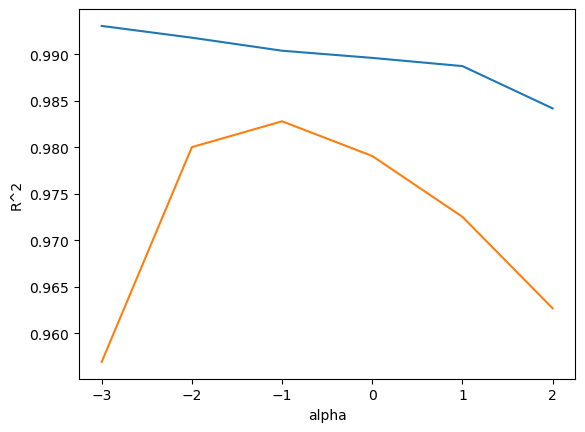

In [23]:
plt.plot(np.log10(alpha_list), train_score)  # alpha(log)별 훈련 점수 그래프
plt.plot(np.log10(alpha_list), test_score)  # alpha(log)별 테스트 점수 그래프
plt.xlabel('alpha')  # x축 레이블
plt.ylabel('R^2')  # y축 레이블
plt.show()  # 그래프 출력

In [24]:
ridge = Ridge(alpha=0.1)  # alpha=0.1로 릿지 모델 생성
ridge.fit(train_scaled, train_target)  # 모델 훈련

print(ridge.score(train_scaled, train_target))  # 훈련 세트 결정계수(R^2) 출력
print(ridge.score(test_scaled, test_target))  # 테스트 세트 결정계수(R^2) 출력

0.9903815817570368
0.9827976465386863


## 라쏘

In [25]:
from sklearn.linear_model import Lasso  # 라쏘 회귀 불러오기

lasso = Lasso()  # 라쏘 회귀 모델 생성
lasso.fit(train_scaled, train_target)  # 모델 훈련
print(lasso.score(train_scaled, train_target))  # 훈련 세트 결정계수(R^2) 출력

0.989789897208096


In [26]:
print(lasso.score(test_scaled, test_target))  # 테스트 세트 결정계수(R^2) 출력

0.9800593698421884


c:\Users\ryan9\anaconda3\envs\ai_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\ryan9\anaconda3\envs\ai_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


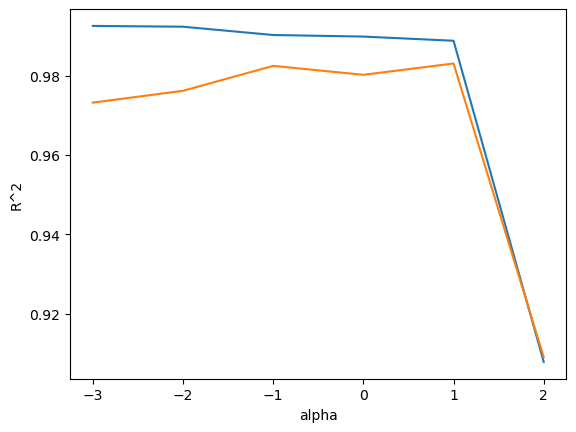

In [27]:
train_score = []  # 훈련 점수 저장 리스트
test_score = []  # 테스트 점수 저장 리스트

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]  # alpha 값 리스트
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)  # alpha 값으로 라쏘 모델 생성
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)  # 모델 훈련
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))  # 훈련 점수 저장
    test_score.append(lasso.score(test_scaled, test_target))  # 테스트 점수 저장

plt.plot(np.log10(alpha_list), train_score)  # alpha(log)별 훈련 점수 그래프
plt.plot(np.log10(alpha_list), test_score)  # alpha(log)별 테스트 점수 그래프
plt.xlabel('alpha')  # x축 레이블
plt.ylabel('R^2')  # y축 레이블
plt.show()  # 그래프 출력

In [28]:
lasso = Lasso(alpha=10)  # alpha=10으로 라쏘 모델 생성
lasso.fit(train_scaled, train_target)  # 모델 훈련

print(lasso.score(train_scaled, train_target))  # 훈련 세트 결정계수(R^2) 출력
print(lasso.score(test_scaled, test_target))  # 테스트 세트 결정계수(R^2) 출력

0.9888067471131867
0.9824470598706695


In [29]:
print(np.sum(lasso.coef_ == 0))  # 계수가 0인 특성 개수 출력

40
